In [58]:
!pip install yfinance


In [59]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt


In [60]:
data = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
data.head()


/tmp/ipython-input-1858447632.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("AAPL", start="2018-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2018-01-02,40.341881,40.351250,39.639305,39.850080,102223600
2018-01-03,40.334866,40.878192,40.271636,40.405124,118071600
2018-01-04,40.522213,40.625258,40.299731,40.407458,89738400
2018-01-05,40.983570,41.070220,40.526897,40.618231,94640000
2018-01-08,40.831360,41.126440,40.732996,40.831360,82271200


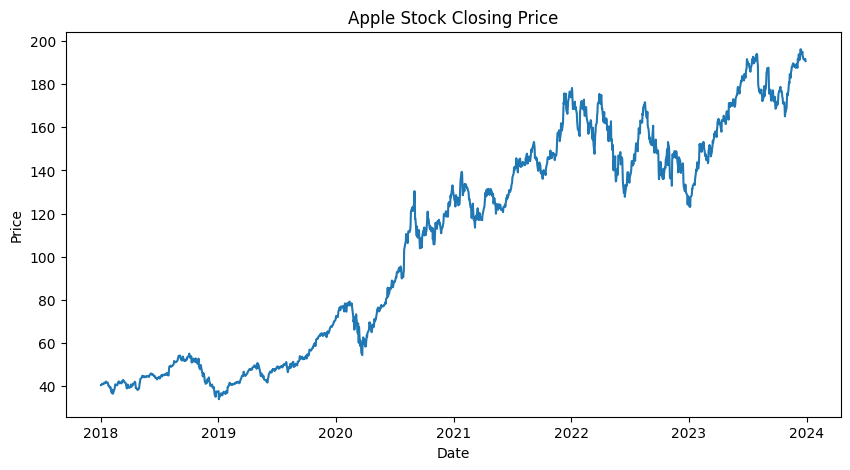

In [61]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.title("Apple Stock Closing Price")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [62]:
data['MA50'] = data['Close'].rolling(50).mean()
data['MA200'] = data['Close'].rolling(200).mean()


In [63]:
data['Return'] = data['Close'].pct_change()
data['Volatility'] = data['Return'].rolling(10).std()
data['Momentum'] = data['Close'] - data['Close'].shift(10)


In [64]:
data = data.dropna()


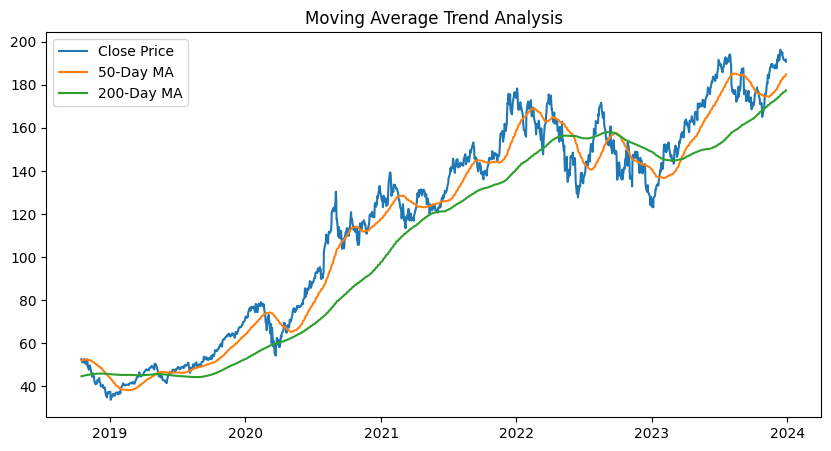

In [65]:
plt.figure(figsize=(10,5))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['MA50'], label='50-Day MA')
plt.plot(data['MA200'], label='200-Day MA')
plt.legend()
plt.title("Moving Average Trend Analysis")
plt.show()


In [66]:
data['Target'] = (data['Close'].shift(-10) > data['Close']).astype(int)
data = data.dropna()


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = data[['MA50', 'MA200', 'Return', 'Volatility', 'Momentum']]
y = data['Target']

split = int(len(X) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    min_samples_split=20,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)


0.42748091603053434